# Necessary Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))

from algorithms.gradient_bandit import GradientBandit

# Random Seed

In [6]:
np.random.seed(42)

# Tuning of the Gradient Bandit

In [7]:
# bandit experiment parameters
num_arms = 10
num_steps = 700
num_runs = 300

# learning rates
learning_rates = [0.5, 0.3, 0.2, 0.1, 0.05]

# performance of algorithm
optimal_action = []

for alpha in learning_rates:

    optimal_action_per_run = []

    for run in range(num_runs):

        # create testbed 
        bandit = GradientBandit(num_arms= num_arms, alpha= alpha)

        # run experiment to obtain average reward and optimal action per step
        optimal_action_per_step = bandit.run_experiment(num_steps= num_steps)

        optimal_action_per_run.append(optimal_action_per_step)

    # obtain the average of the runs
    optimal_action.append(np.mean(optimal_action_per_run, axis=0))

# Optimal Action

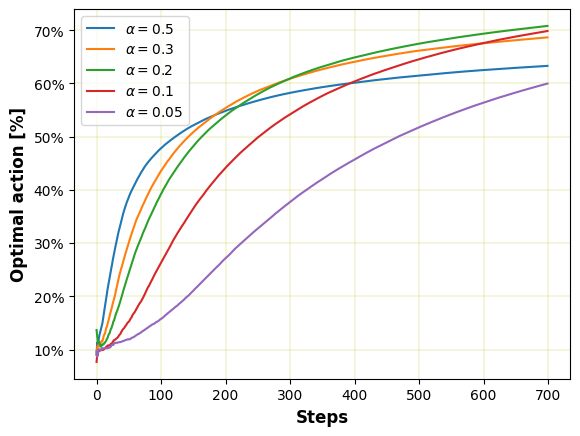

In [8]:
plt.plot(optimal_action[0], label = '$\\alpha = {}$'.format(learning_rates[0]))
plt.plot(optimal_action[1], label = '$\\alpha = {}$'.format(learning_rates[1]))
plt.plot(optimal_action[2], label = '$\\alpha = {}$'.format(learning_rates[2]))
plt.plot(optimal_action[3], label = '$\\alpha = {}$'.format(learning_rates[3]))
plt.plot(optimal_action[4], label = '$\\alpha = {}$'.format(learning_rates[4]))
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Steps', weight = 'bold', fontsize = 12)
plt.ylabel('Optimal action [%]', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)